In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brent-oil-prices/BrentOilPrices.csv


In [17]:
data = pd.read_csv('/kaggle/input/brent-oil-prices/BrentOilPrices.csv')
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [18]:
print(data.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [19]:
print(data.shape)

(9011, 2)


In [20]:
print(data.sample(5))

           Date  Price
610   06-Oct-89  18.45
722   16-Mar-90  18.40
2542  15-May-97  19.40
2648  20-Oct-97  19.29
8242  06-Nov-19  62.11


In [21]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [6]:
import pandas as pd
import numpy as np

# Import the dataset
data = pd.read_csv('/kaggle/input/brent-oil-prices/BrentOilPrices.csv')
# Convert date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date
data.sort_values('Date', inplace=True)

# Rename columns
data.rename(columns={'Price':'Closing_Price'}, inplace=True)

# Added a new feature of the average price for the past 7 days
data['Moving_Avg_7'] = data['Closing_Price'].rolling(window=7).mean().fillna(0)

# Added a new average price feature for the past 30 days
data['Moving_Avg_30'] = data['Closing_Price'].rolling(window=30).mean().fillna(0)

# Delete any rows with missing values
data.dropna(inplace=True)

# Show some basic information of the data
print(data.head())
print(data.describe())

# Data preparation
dataset = data[['Moving_Avg_7', 'Moving_Avg_30']].values
X = dataset[:, :-1]
y = dataset[:, 1]

# Data plot
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Moving_Avg_7'], name='Moving Average 7 Days'))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Moving_Avg_30'], name='Moving Average 30 Days'))
fig.update_layout(title='Brent Oil Prices - Moving Averages', xaxis_title='Date', yaxis_title='Price')
fig.show()


        Date  Closing_Price  Moving_Avg_7  Moving_Avg_30
0 1987-05-20          18.63           0.0            0.0
1 1987-05-21          18.45           0.0            0.0
2 1987-05-22          18.55           0.0            0.0
3 1987-05-25          18.60           0.0            0.0
4 1987-05-26          18.63           0.0            0.0
       Closing_Price  Moving_Avg_7  Moving_Avg_30
count    9011.000000   9011.000000    9011.000000
mean       48.420782     48.383003      48.238501
std        32.860110     32.842273      32.783723
min         9.100000      0.000000       0.000000
25%        19.050000     19.070000      18.999333
50%        38.570000     38.764286      38.332667
75%        70.090000     70.142857      70.208500
max       143.950000    140.011429     135.606667


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Closing_Price'}>],
       [<AxesSubplot:title={'center':'Moving_Avg_7'}>,
        <AxesSubplot:title={'center':'Moving_Avg_30'}>]], dtype=object)

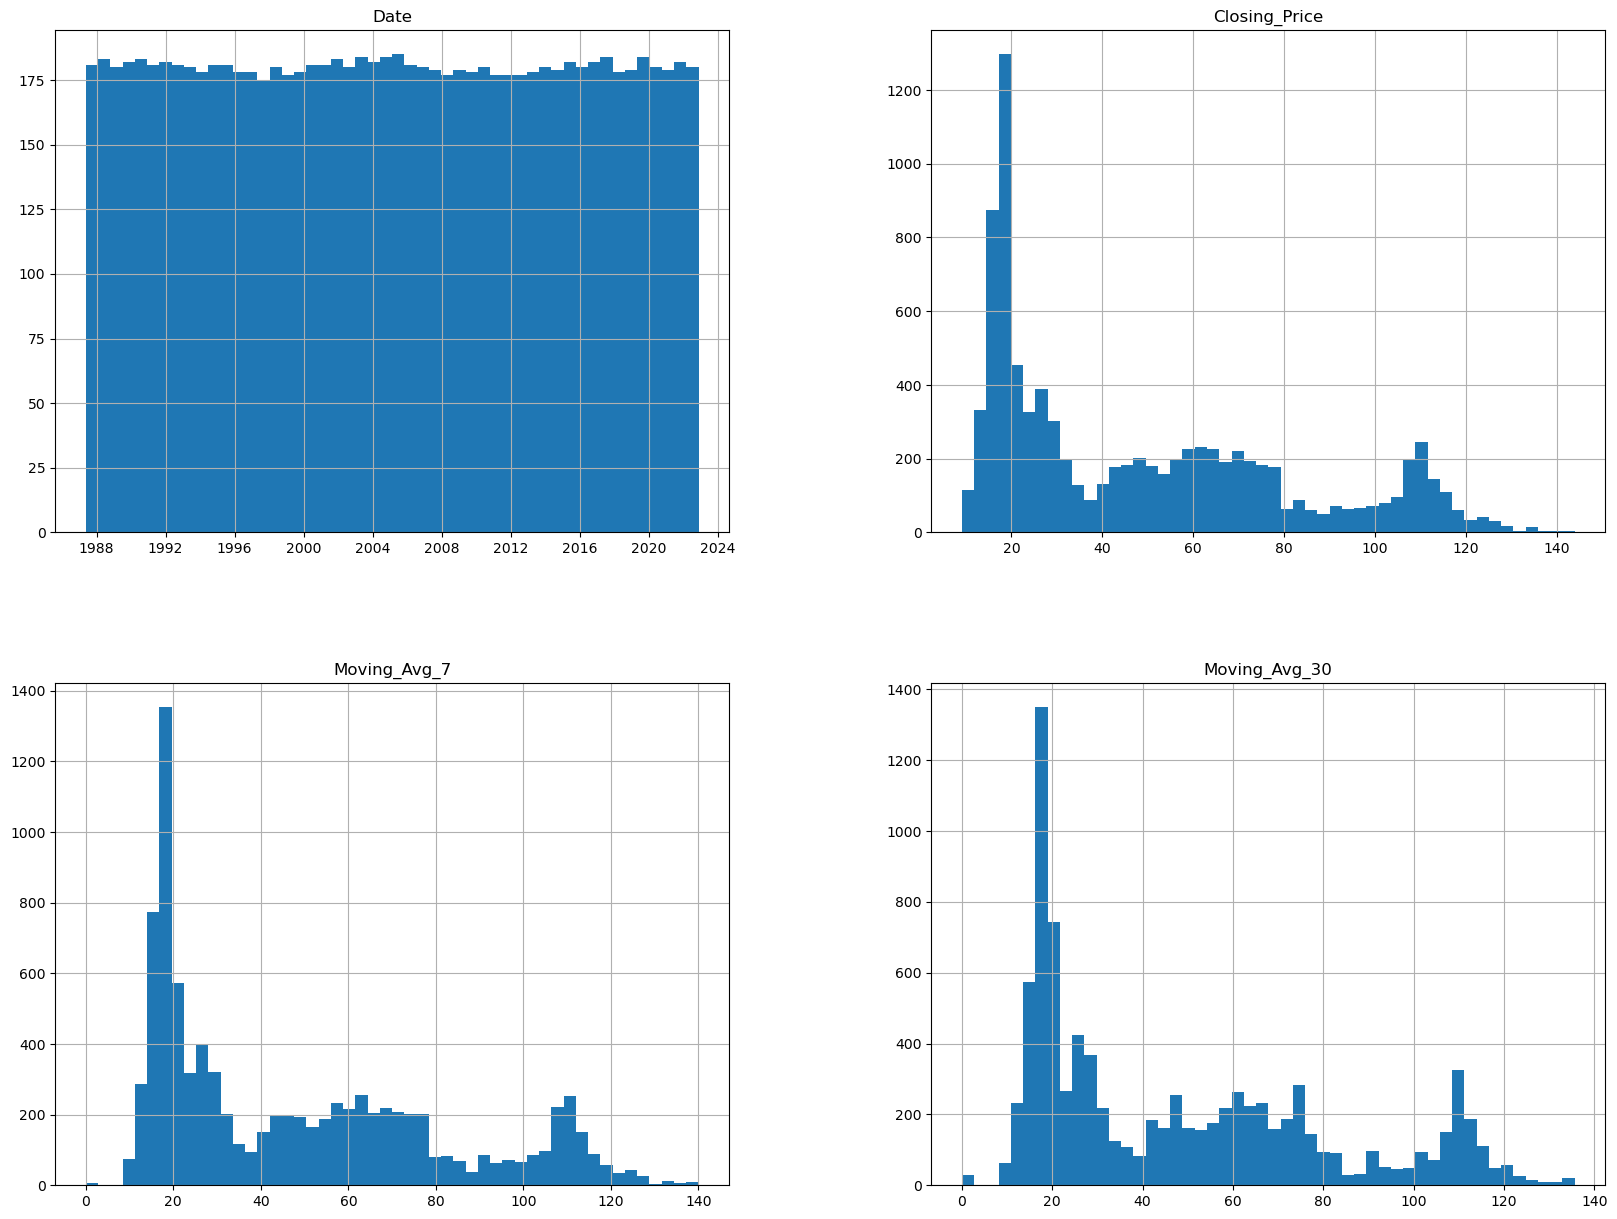

In [8]:
data.hist(bins=50, figsize=(20,15))

In [29]:


# Divide the data into a training and test set by 80:20
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

print("The number of data points in the training set:", len(train_data))
print("The number of data points in the test set:", len(test_data))


The number of data points in the training set: 7208
The number of data points in the test set: 1803


In [30]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

# # Import the dataset
df = pd.read_csv('/kaggle/input/brent-oil-prices/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')

# Convert dates to a format that can be converted to a number
df['Date'] = df.index.strftime('%Y%m%d').astype(int)

#Define input and output columns
X_train = df[['Date']].to_numpy()
y_train = df['Price'].to_numpy()

#Determine the basic parameters of the model
input_size = 1
hidden_size = 32
output_size = 1
batch_size = 80
num_epochs = 200


#Create the form
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.out(x)
        return x

net = Net(input_size, hidden_size, output_size)

# Definition of loss function, performance criterion and error function
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.02)

# Model training
for epoch in range(num_epochs):
  
    for i in range(0, len(X_train), batch_size):
        batch_x = torch.Tensor(X_train[i:i+batch_size]).view(-1, input_size)
        batch_y = torch.Tensor(y_train[i:i+batch_size]).view(-1, output_size)
        optimizer.zero_grad()
        outputs = net(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        # save Model 
      
        FILE="trained_model.pth"
#torch.save(net.state_dict(), FILE)
model = torch.load(FILE)
#model.eval()
       



In [24]:
new_data = pd.DataFrame({'Date': ['20220329', '20220330', '20220331'], 'Price': [80.0, 81.5, 82.0]})
new_data['Date'] = new_data['Date'].astype(int)

X_test = new_data[['Date']].to_numpy()
with torch.no_grad():
    net.eval()
    y_pred = net(torch.Tensor(X_test).view(-1, input_size)).numpy()
    predicted_prices = pd.DataFrame({'Date': pd.to_datetime(new_data['Date'], format='%Y%m%d'), 'Price': y_pred.flatten()})


In [46]:

# تحويل المدخلات المراد توقع أسعار النفط لتناسب مدخلات النموذج
test_date = pd.to_datetime('2023-04-01')
test_date_int = int(test_date.strftime('%Y%m%d'))
test_x = torch.Tensor([[test_date_int]]).view(-1, input_size)

# توقع سعر النفط باستخدام النموذج
predicted_price = net.forward(test_x).item()

# عرض النتيجة
print(f"Predicted Brent oil price on {test_date.date()} is: {predicted_price:.2f}")


Predicted Brent oil price on 2023-04-01 is: 77.63


In [37]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.out(x)
        return x

# تحديد المعاملات الأساسية للنموذج
input_size = 1
hidden_size = 32
output_size = 1

# إنشاء نموذج الشبكة العصبية
model = Net(input_size, hidden_size, output_size)

# تحميل الوزنات من ملف "trained_model.pth"
model.load_state_dict(torch.load("trained_model.pth"))
        
torch.save(net.state_dict(), "trained_model1.pth")

#model.eval()

In [40]:
from flask import Flask, request
import torch
import torch.nn as nn

# إنشاء نموذج الشبكة العصبية
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.out(x)
        return x

# تحديد المعاملات الأساسية للنموذج
input_size = 1
hidden_size = 32
output_size = 1

# تحميل الوزنات من ملف "trained_model.pth"
model = Net(input_size, hidden_size, output_size)
model.load_state_dict(torch.load("trained_model1.pth"))

# إنشاء التطبيق Flask
app = Flask(__name__)

# إضافة مسار REST API
@app.route('/predict', methods=['POST'])
def predict():
    # الحصول على البيانات المرسلة عبر REST API
    data = request.json
    # تحويل البيانات إلى تنسور Torch
    x = torch.Tensor(data).view(-1, input_size)
    # استخدام النموذج في التنبؤ
    output = model(x)
    # تحويل النتيجة إلى نص
    result = str(output.detach().numpy()[0][0])
    # إرجاع النتيجة كاستجابة REST API
    return result

if __name__ == '__main__':
    app.run(debug=True,port=5555)


 * Serving Flask app '__main__'
 * Debug mode: on


Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 1040, in launch_instance
    app.initialize(argv)
  File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 666, in initialize
    self.init_sockets()
  File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 307, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 244, in _bind_socket
    return self._try_bind_socket(s, port)
  File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 220, in _try_bind_socket
    s.bind("tcp://%s:%i" % (sel

SystemExit: 1